In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [126]:
df_cov=pd.read_csv('project18a_covid.csv',parse_dates=['Date'])
df_cov=pd.DataFrame(df_cov)
df_cov

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


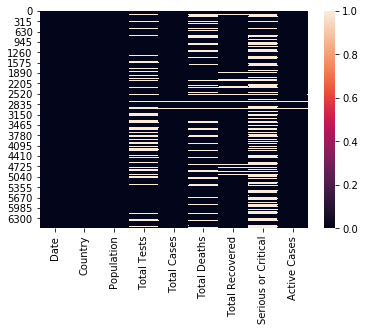

In [127]:
#checking for any missing data
sns.heatmap(df_cov.isnull())

In [128]:
df_cov.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [129]:
df_cov.dropna(inplace=True)

In [130]:
df_cov.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [131]:
coun1 = df_cov.groupby("Country")["Total Tests"].sum().rename("No of tests")
coun2 = df_cov.groupby("Country")["Total Cases"].sum().rename("No of cases")
coun3 = df_cov.groupby("Country")["Total Deaths"].sum().rename("No of deaths")
coun4 = df_cov.groupby("Country")["Total Recovered"].sum().rename("No of recovered")
coun5 = df_cov.groupby("Country")["Serious or Critical"].sum().rename("No of serious")

In [132]:
coun6 = df_cov.groupby("Country")["Population"].unique().rename("Population").astype(int)

In [133]:
df_covid=pd.concat([coun1,coun2,coun3,coun4,coun5,coun6],axis=1)
df_covid.head()

,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population
Country,,,,,,
Afghanistan,382382.0,97055.0,2710.0,12156.0,246.0,38817349
Albania,273700.0,24227.0,915.0,16353.0,142.0,2878155
Algeria,198359.0,142955.0,14356.0,65672.0,882.0,43752773
Andorra,58094.0,23061.0,1359.0,14214.0,410.0,77251
Antigua and Barbuda,4380.0,758.0,93.0,427.0,31.0,97833


In [134]:
df_covid_new= df_covid.reset_index()
df_covid_new.head()

,Country,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population
0,Afghanistan,382382.0,97055.0,2710.0,12156.0,246.0,38817349
1,Albania,273700.0,24227.0,915.0,16353.0,142.0,2878155
2,Algeria,198359.0,142955.0,14356.0,65672.0,882.0,43752773
3,Andorra,58094.0,23061.0,1359.0,14214.0,410.0,77251
4,Antigua and Barbuda,4380.0,758.0,93.0,427.0,31.0,97833


In [135]:
df_covid_new["Death Rate"]=df_covid_new['No of deaths']/df_covid_new['Population']

In [136]:
df_covid_new

,Country,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population,Death Rate
0,Afghanistan,382382.0,97055.0,2710.0,12156.0,246.0,38817349,0.000070
1,Albania,273700.0,24227.0,915.0,16353.0,142.0,2878155,0.000318
2,Algeria,198359.0,142955.0,14356.0,65672.0,882.0,43752773,0.000328
3,Andorra,58094.0,23061.0,1359.0,14214.0,410.0,77251,0.017592
4,Antigua and Barbuda,4380.0,758.0,93.0,427.0,31.0,97833,0.000951
...,...,...,...,...,...,...,...,...
123,Uruguay,699533.0,19975.0,493.0,13726.0,283.0,3472331,0.000142
124,Uzbekistan,8693288.0,66855.0,280.0,40911.0,248.0,33409960,0.000008
125,Venezuela,14289530.0,11521.0,308.0,5203.0,70.0,28445034,0.000011
126,Vietnam,261004.0,270.0,0.0,219.0,8.0,97234232,0.000000


In [137]:
df_covid_new.dtypes

Country             object
No of tests        float64
No of cases        float64
No of deaths       float64
No of recovered    float64
No of serious      float64
Population           int32
Death Rate         float64
dtype: object

In [138]:
df_covid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          128 non-null    object 
 1   No of tests      128 non-null    float64
 2   No of cases      128 non-null    float64
 3   No of deaths     128 non-null    float64
 4   No of recovered  128 non-null    float64
 5   No of serious    128 non-null    float64
 6   Population       128 non-null    int32  
 7   Death Rate       128 non-null    float64
dtypes: float64(6), int32(1), object(1)
memory usage: 7.6+ KB


In [139]:
df_covid_new.describe()

,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population,Death Rate
count,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,128.000000,1.280000e+02,128.000000
mean,8.420689e+06,7.710857e+05,4.981298e+04,2.631556e+05,11857.382812,2.944064e+07,0.001786
std,2.555495e+07,3.390944e+06,2.226942e+05,8.249942e+05,51506.622228,5.130915e+07,0.004695
min,7.560000e+02,1.800000e+01,0.000000e+00,1.300000e+01,1.000000,4.992000e+03,0.000000
25%,2.336155e+05,1.562900e+04,2.482500e+02,5.398500e+03,89.250000,2.599533e+06,0.000067
50%,1.596242e+06,6.511700e+04,1.391500e+03,2.378850e+04,410.000000,9.556400e+06,0.000254
75%,6.134760e+06,3.317998e+05,7.735500e+03,9.089325e+04,2723.750000,3.303941e+07,0.001098
max,2.320005e+08,3.619650e+07,2.102393e+06,6.004896e+06,488102.000000,3.307747e+08,0.037143


In [140]:
df_cov1=pd.read_csv('project18b_covid.csv')
df_cov1=pd.DataFrame(df_cov1)
df_cov1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [141]:
df_cov1.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [142]:
df_cov1.dropna(inplace=True)

In [143]:
df_cov1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
200,Comoros,0.398,0.573,0.030
202,Suriname,0.264,0.666,0.069
204,Seychelles,0.222,0.692,0.086
206,Papua New Guinea,0.359,0.603,0.038


In [144]:
df_covid_new['Country'].dtypes

dtype('O')

In [145]:
df_cov_temp=pd.merge(df_cov1,df_covid_new,on='Country',how='left')

In [146]:
df_cov_temp

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population,Death Rate
0,USA,0.189,0.657,0.154,232000501.0,36196503.0,2102393.0,6004896.0,488102.0,330774664.0,0.006356
1,Russia,0.176,0.682,0.142,130214963.0,4579604.0,42407.0,745508.0,61916.0,145927292.0,0.000291
2,Spain,0.147,0.659,0.194,55646156.0,7547975.0,767305.0,4401203.0,126692.0,46752703.0,0.016412
3,Brazil,0.217,0.697,0.086,12361642.0,3660023.0,248971.0,1533045.0,254091.0,212380932.0,0.001172
4,UK,0.177,0.638,0.185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
171,Comoros,0.398,0.573,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Suriname,0.264,0.666,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Seychelles,0.222,0.692,0.086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Papua New Guinea,0.359,0.603,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_cov_temp.dropna(inplace=True)

In [148]:
df_cov_temp

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population,Death Rate
0,USA,0.189,0.657,0.154,232000501.0,36196503.0,2102393.0,6004896.0,488102.0,330774664.0,0.006356
1,Russia,0.176,0.682,0.142,130214963.0,4579604.0,42407.0,745508.0,61916.0,145927292.0,0.000291
2,Spain,0.147,0.659,0.194,55646156.0,7547975.0,767305.0,4401203.0,126692.0,46752703.0,0.016412
3,Brazil,0.217,0.697,0.086,12361642.0,3660023.0,248971.0,1533045.0,254091.0,212380932.0,0.001172
5,Italy,0.135,0.635,0.230,66944808.0,6416833.0,881699.0,2621286.0,48807.0,60471924.0,0.014580
...,...,...,...,...,...,...,...,...,...,...,...
149,Barbados,0.191,0.660,0.150,72985.0,2516.0,202.0,1395.0,124.0,287335.0,0.000703
151,Malawi,0.440,0.530,0.030,29564.0,1315.0,89.0,361.0,31.0,19066433.0,0.000005
159,Antigua and Barbuda,0.239,0.692,0.069,4380.0,758.0,93.0,427.0,31.0,97833.0,0.000951
163,Grenada,0.263,0.664,0.073,1406.0,21.0,0.0,13.0,4.0,112462.0,0.000000


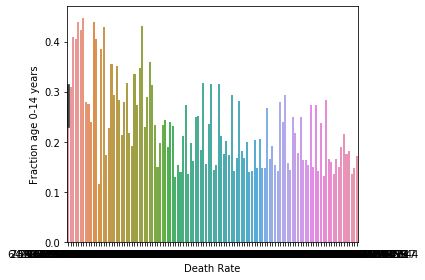

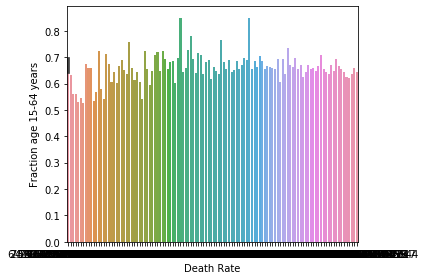

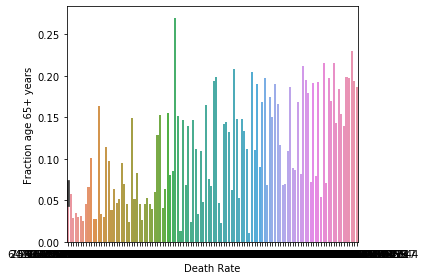

In [150]:
for i in ['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']:
    sns.barplot(x='Death Rate',y=i,data=df_cov_temp)
    plt.tight_layout()
    plt.show()

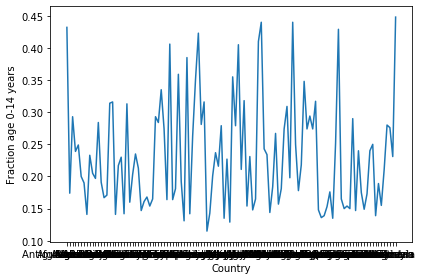

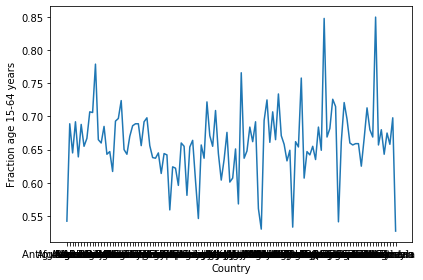

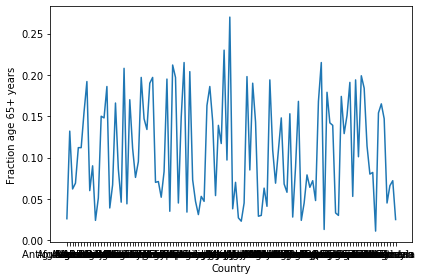

In [152]:
for i in ['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']:
    sns.lineplot(x='Country',y=i,data=df_cov_temp)
    plt.tight_layout()
    plt.show()

# Univariate Analysis

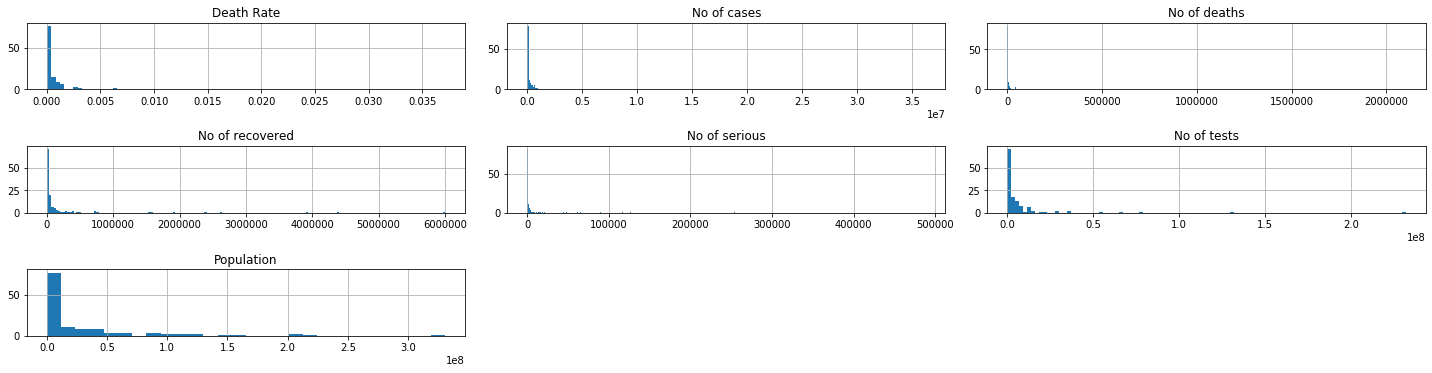

In [16]:
df_covid_new.hist(figsize = (20,10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

In [17]:
df_covid_new.columns

Index(['Country', 'No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate'],
      dtype='object')

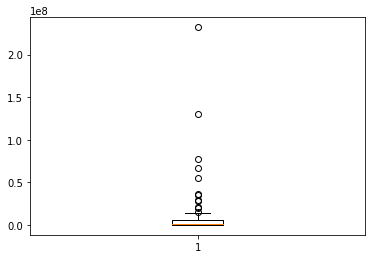

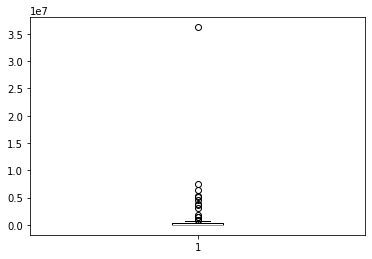

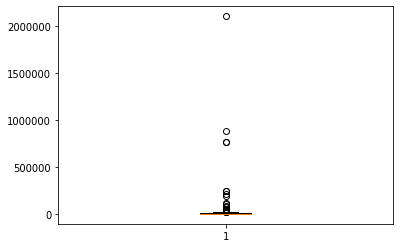

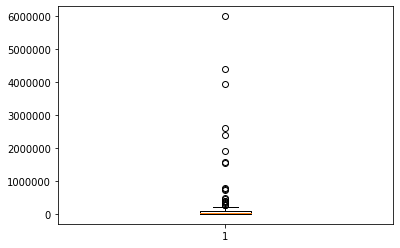

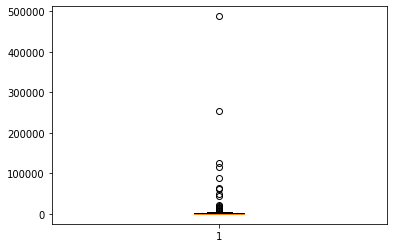

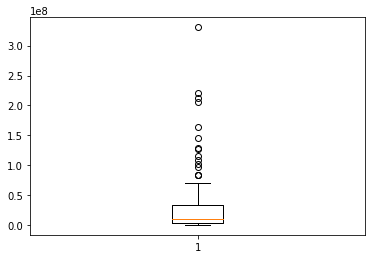

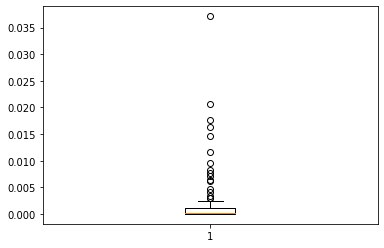

In [18]:
for i in ['No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate'] :
    plt.boxplot(df_covid_new[i])
    plt.show()

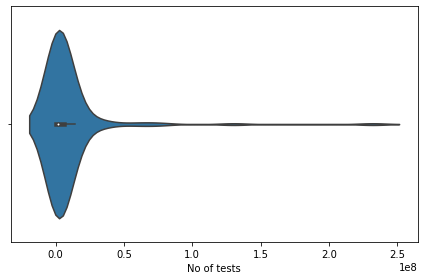

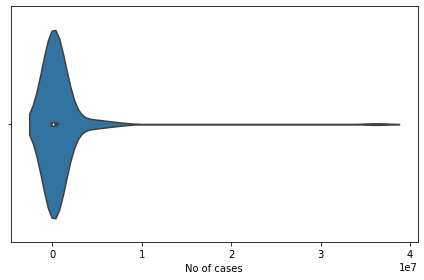

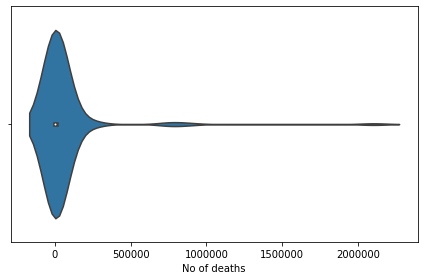

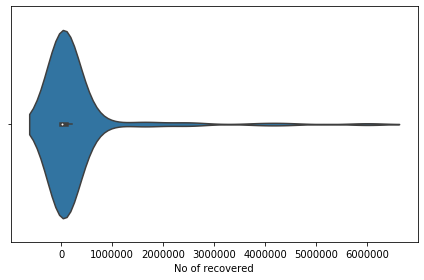

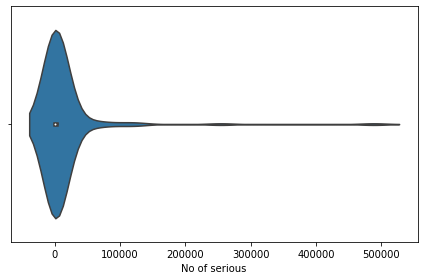

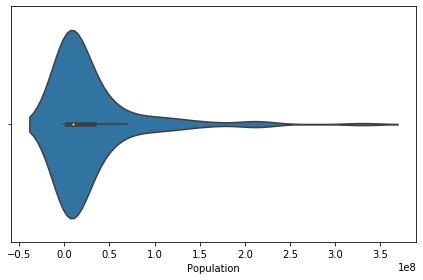

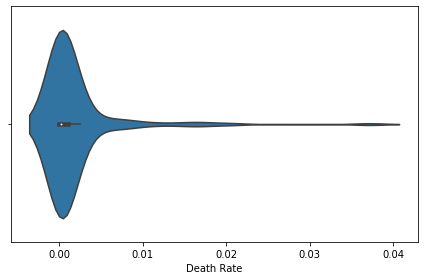

In [19]:
for i in ['No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate']:
    sns.violinplot(x=i,data=df_covid_new)
    plt.tight_layout()
    plt.show()

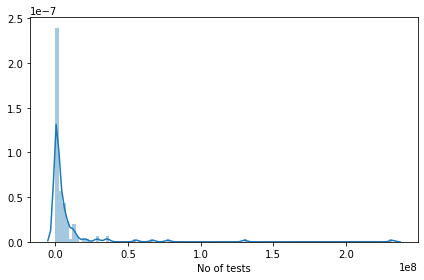

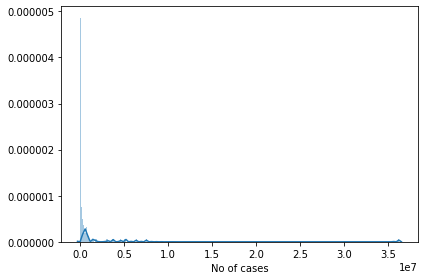

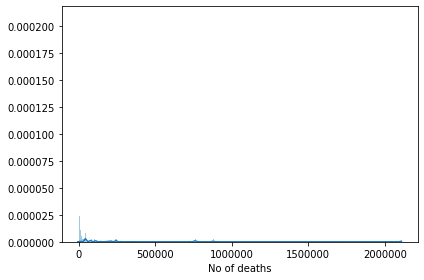

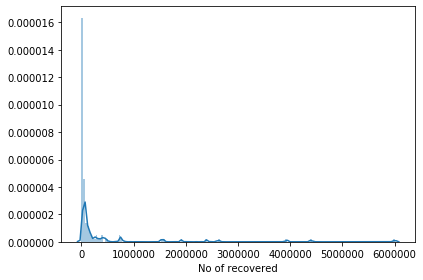

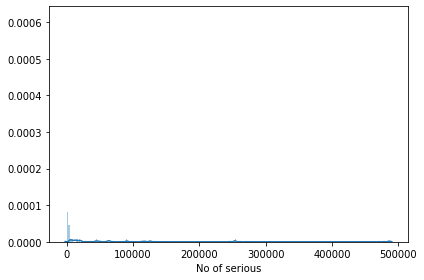

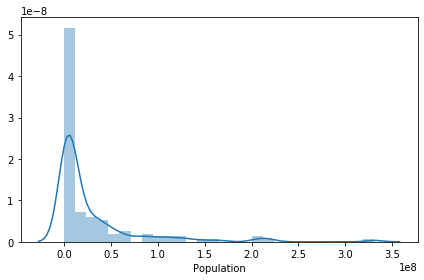

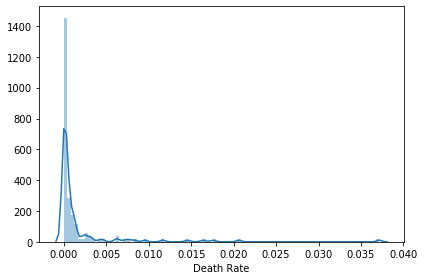

In [20]:
#Checking for the distribution of the data
for i in ['No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate']:
    sns.distplot(df_covid_new[i],bins='auto')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

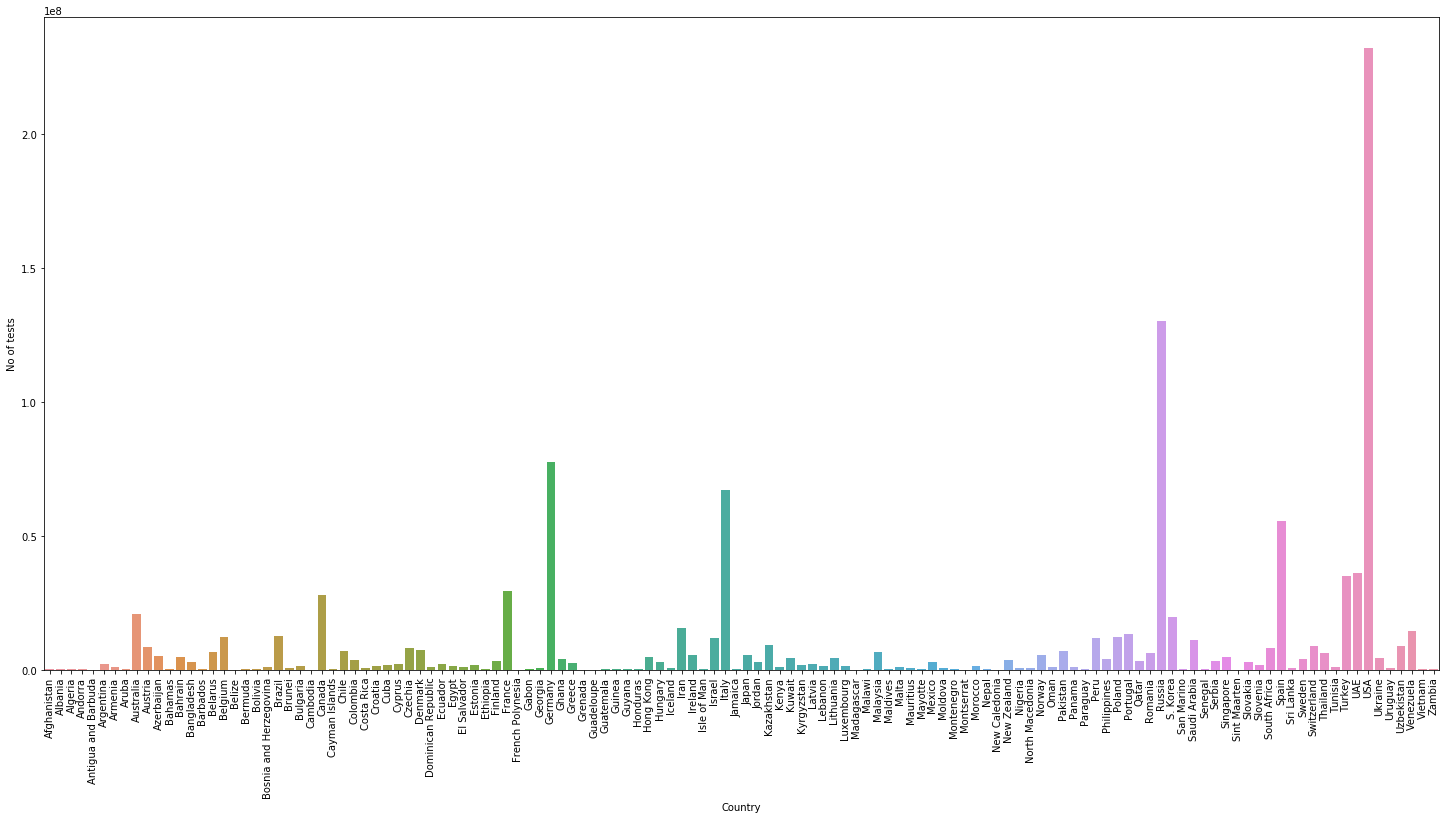

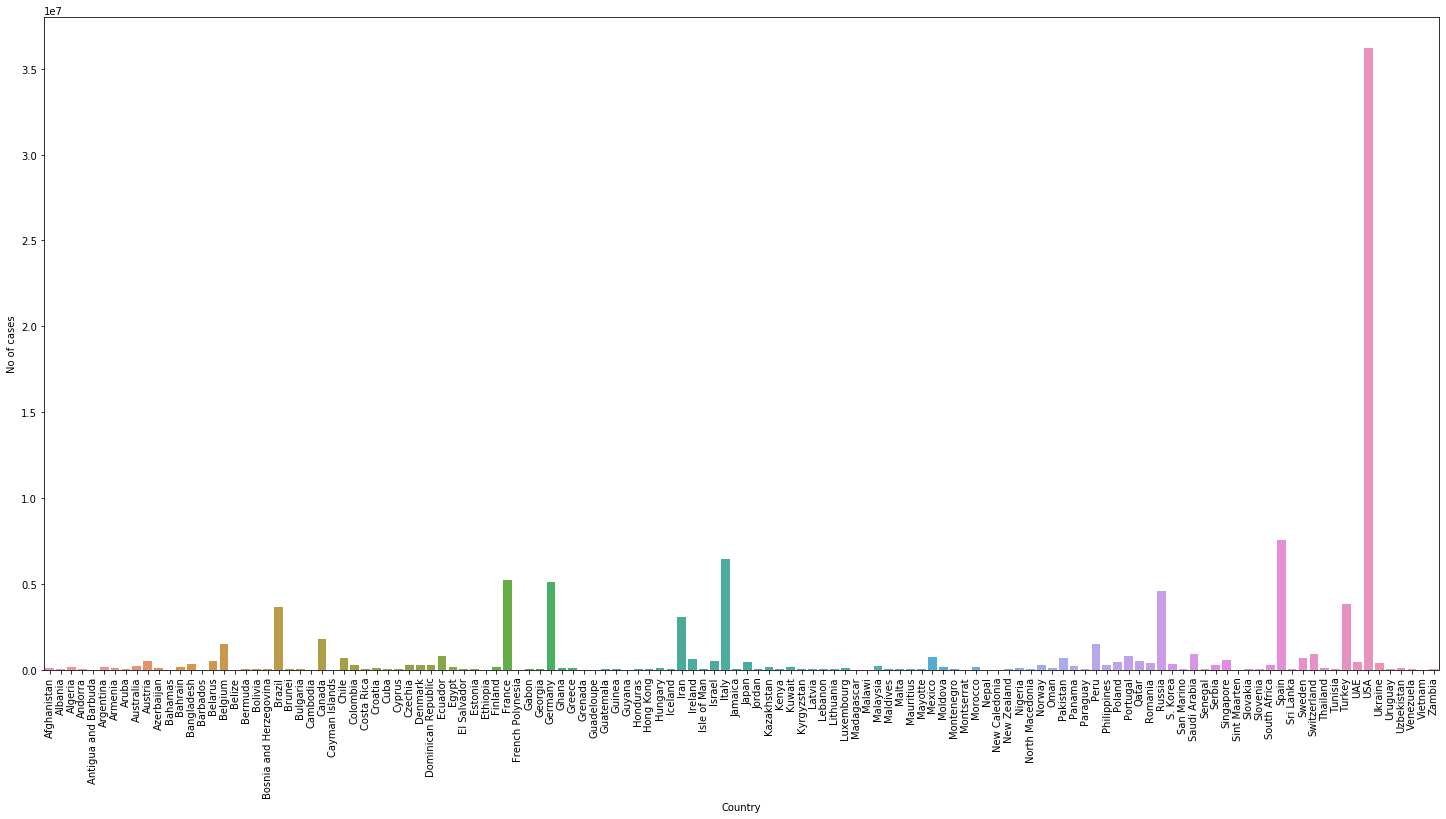

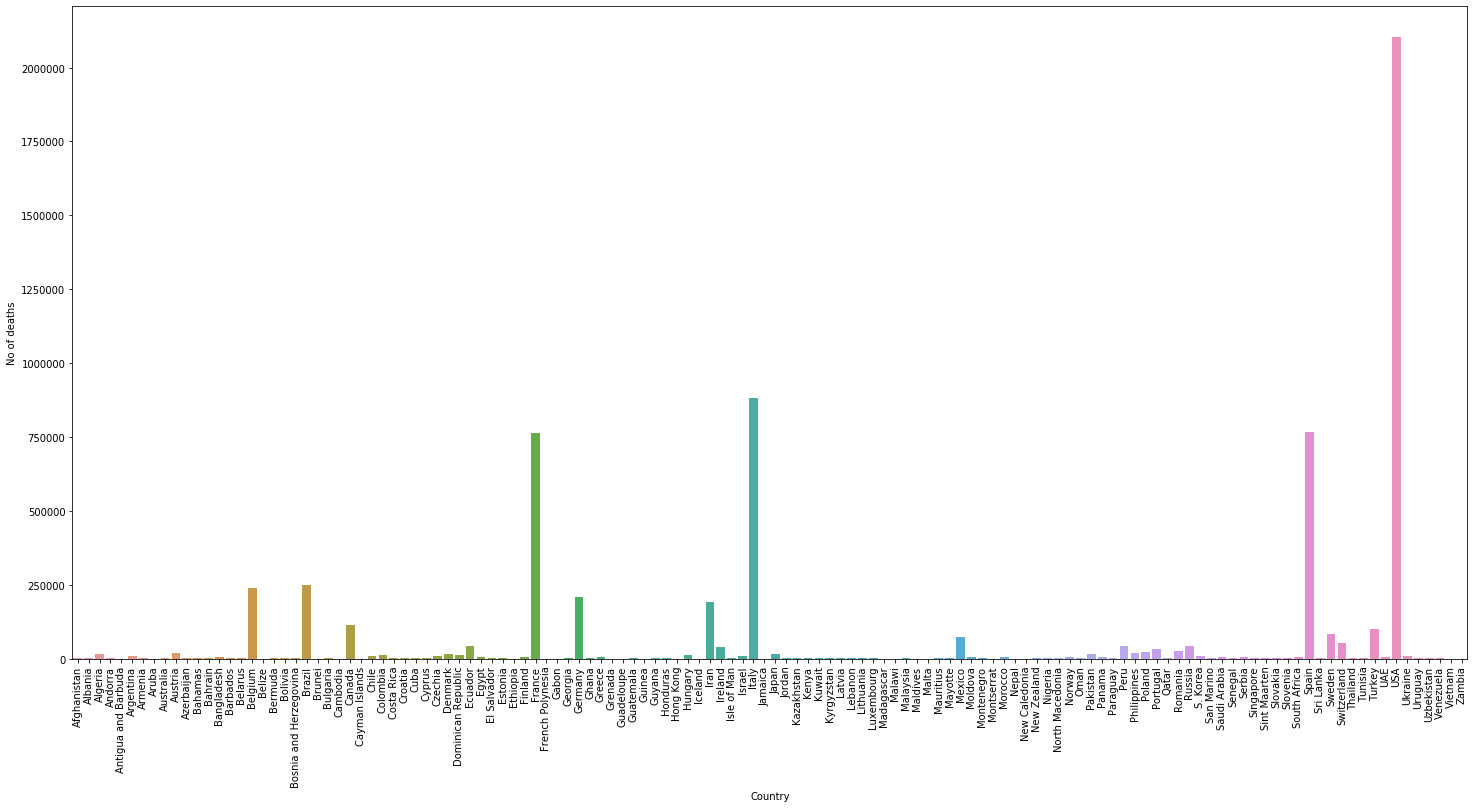

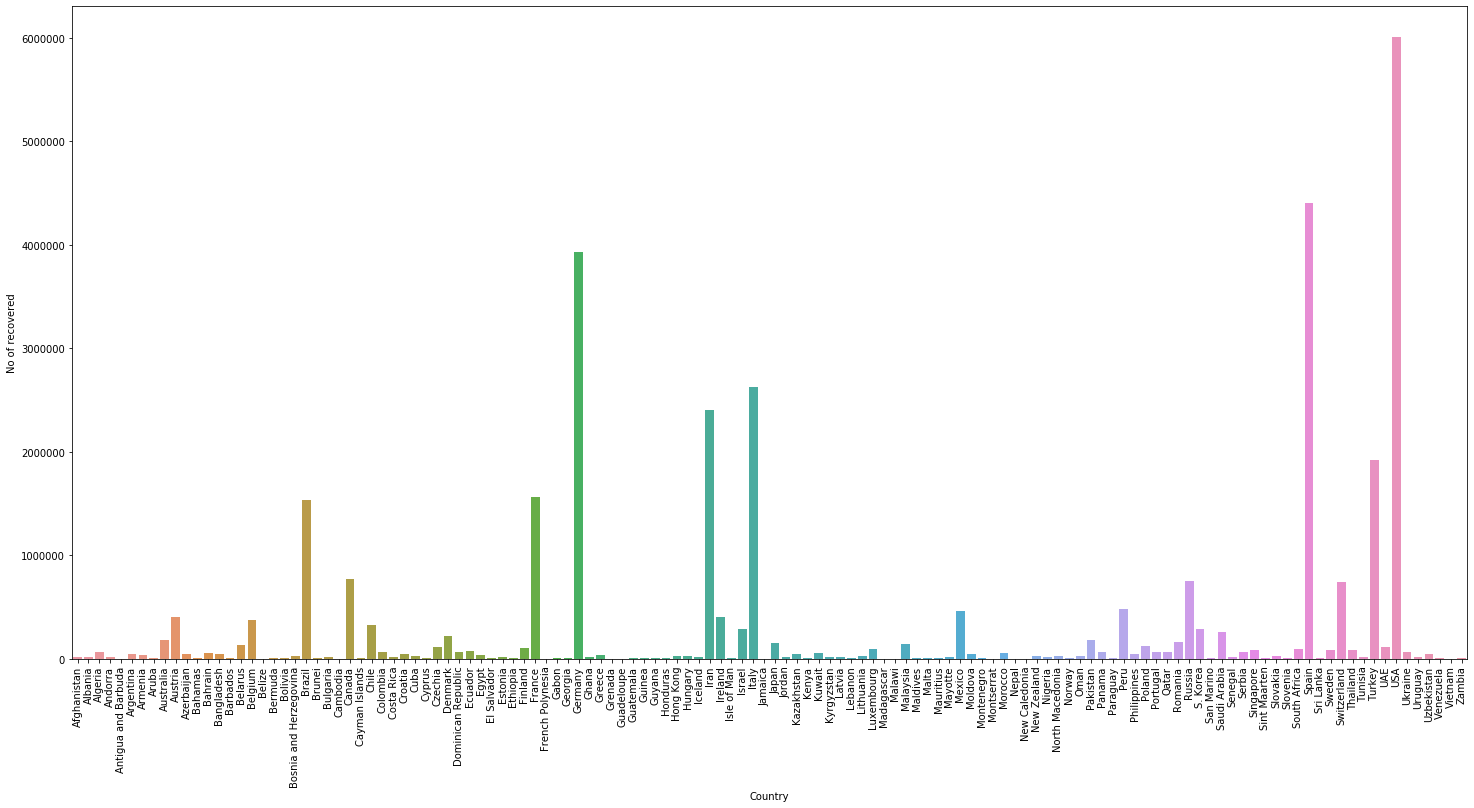

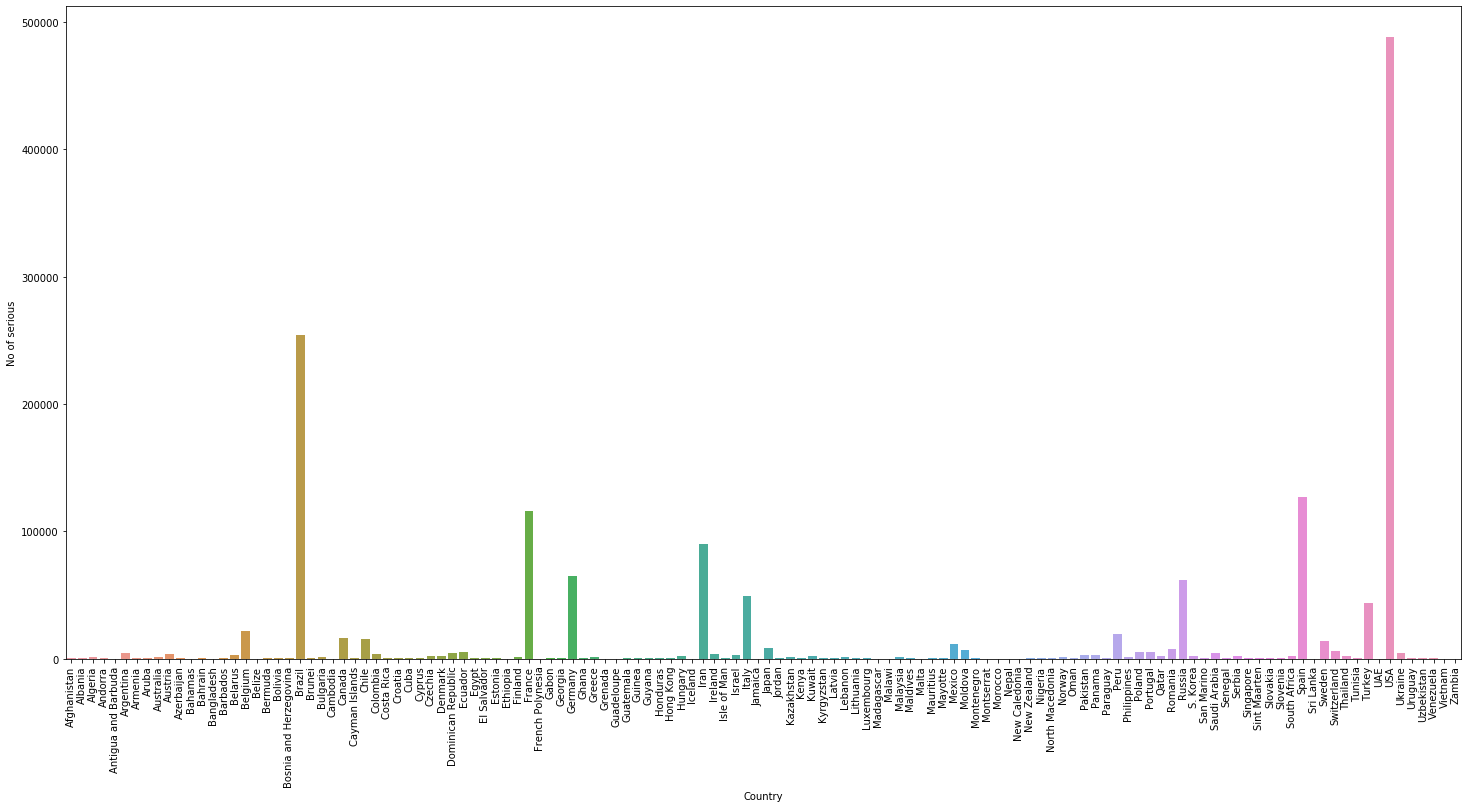

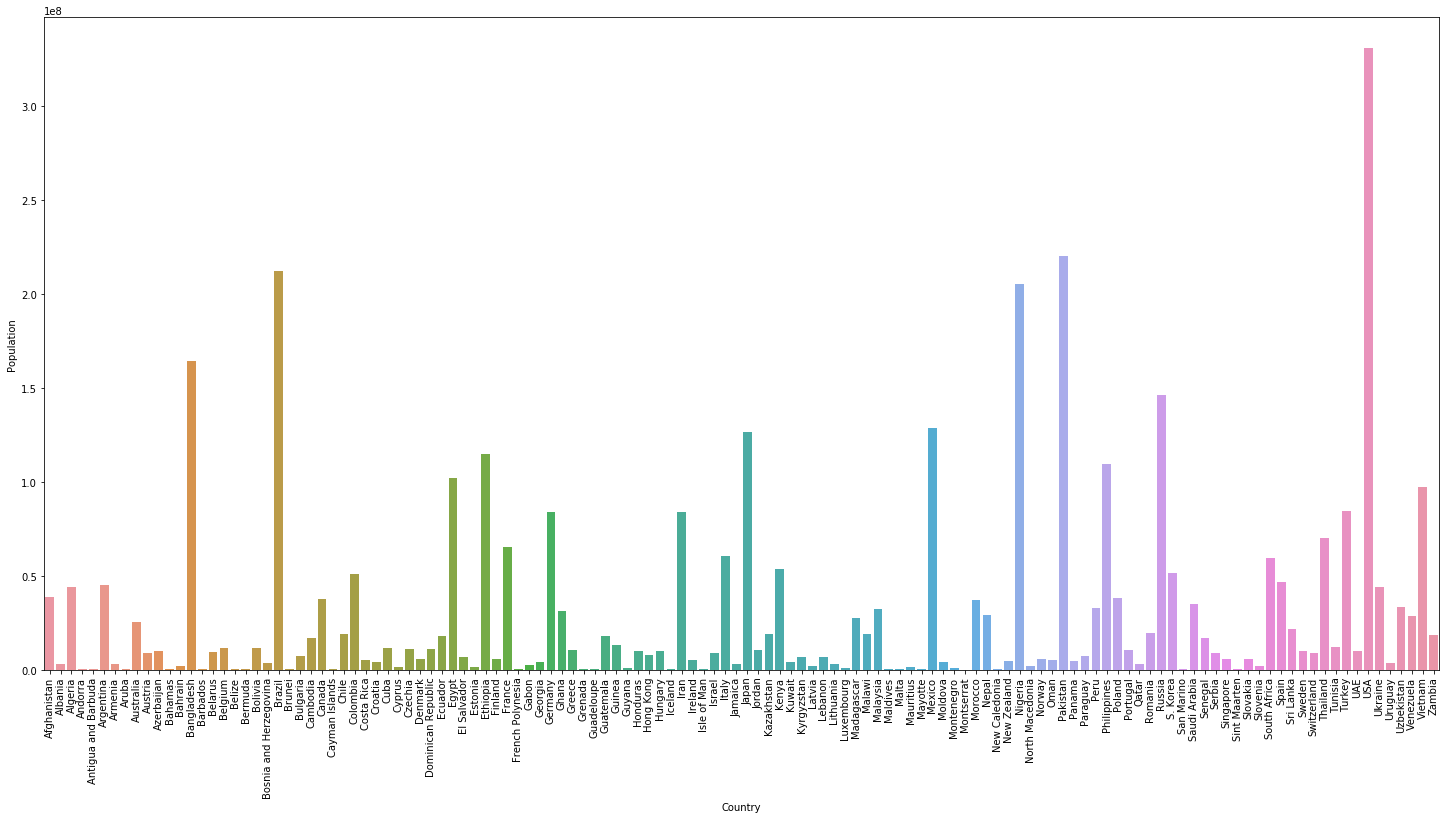

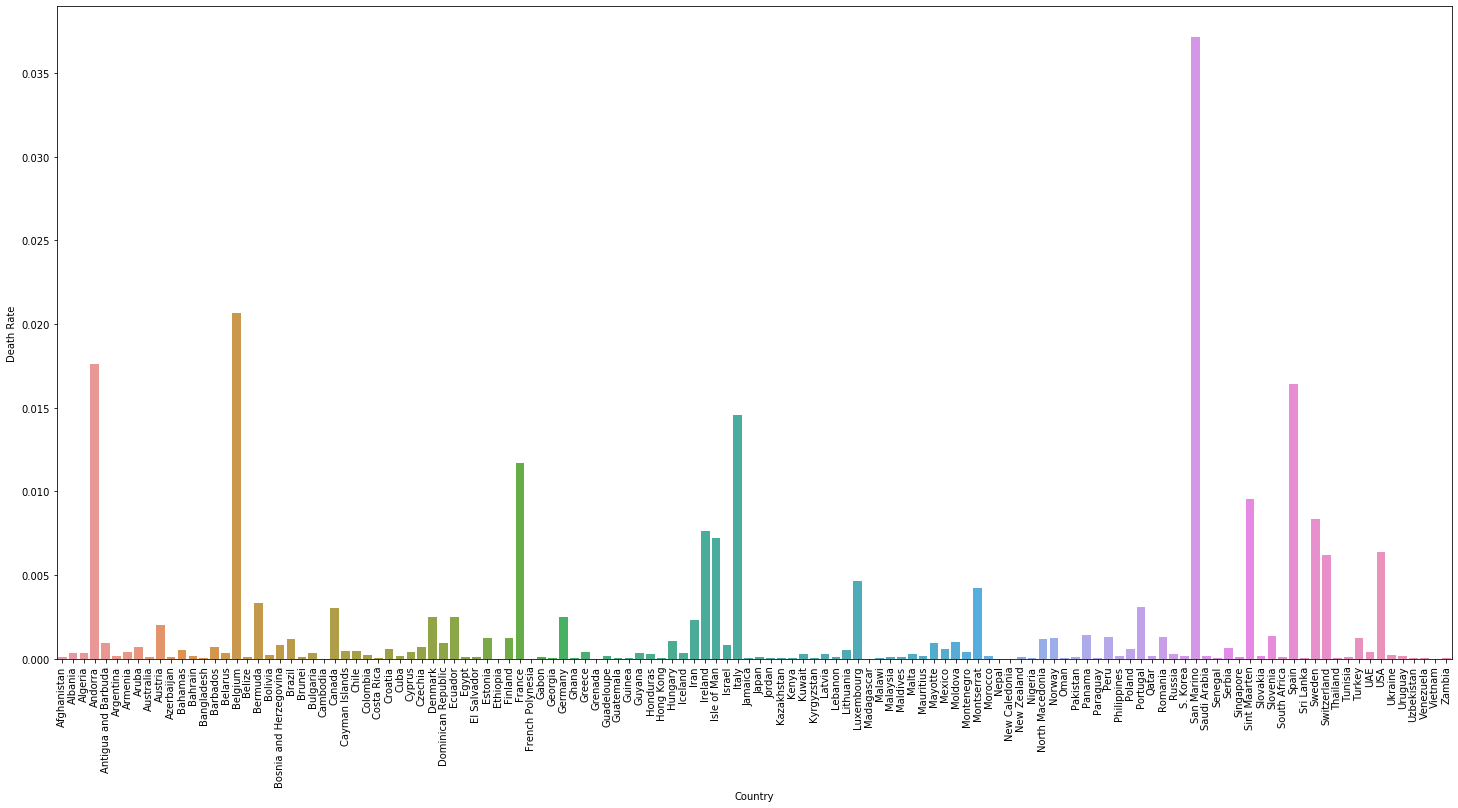

In [106]:
for i in ['No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate']:
    plt.figure(figsize=(25,12))
    plt.xticks(rotation=90)
    sns.barplot(df_covid_new['Country'],df_covid_new[i])
    plt.show()

In [21]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_covid_new['Country']=le.fit_transform(df_covid_new["Country"])

In [22]:
#Checking the correlation between the attributes
df_covid_new.corr()

,Country,No of tests,No of cases,No of deaths,No of recovered,No of serious,Population,Death Rate
Country,1.000000,0.198615,0.158882,0.120703,0.134321,0.100115,0.157839,0.050155
No of tests,0.198615,1.000000,0.908558,0.829947,0.815999,0.808920,0.589614,0.182504
No of cases,0.158882,0.908558,1.000000,0.946163,0.842293,0.925564,0.607304,0.212738
No of deaths,0.120703,0.829947,0.946163,1.000000,0.859381,0.886963,0.540121,0.338301
No of recovered,0.134321,0.815999,0.842293,0.859381,1.000000,0.824426,0.535018,0.304562
No of serious,0.100115,0.808920,0.925564,0.886963,0.824426,1.000000,0.656385,0.198644
Population,0.157839,0.589614,0.607304,0.540121,0.535018,0.656385,1.000000,-0.011529
Death Rate,0.050155,0.182504,0.212738,0.338301,0.304562,0.198644,-0.011529,1.000000


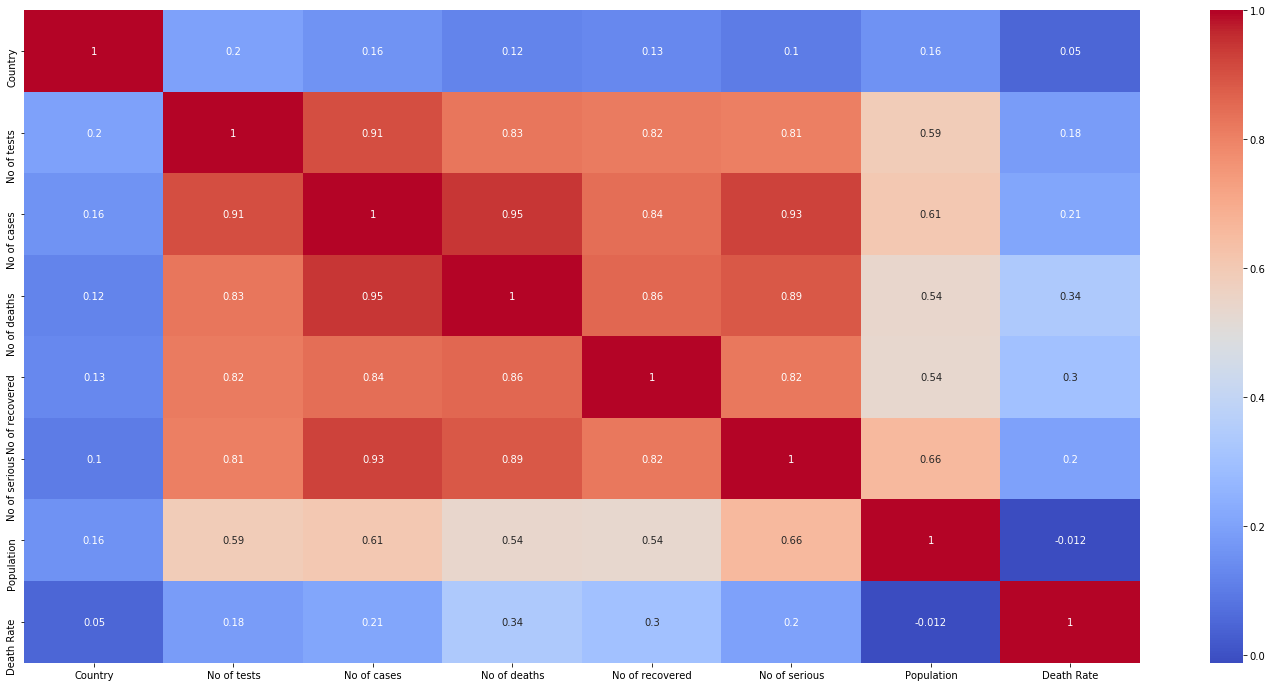

In [23]:
plt.figure(figsize=(25,12))
sns.heatmap(df_covid_new.corr(),cmap='coolwarm',annot=True)
plt.show()

In [24]:
df_covid_new.drop(['Country'],axis=1,inplace=True)

In [25]:
#Cheking the skewness of data
df_covid_new.skew()

No of tests        6.538213
No of cases        9.273734
No of deaths       7.216791
No of recovered    4.846870
No of serious      7.350206
Population         3.140975
Death Rate         4.791593
dtype: float64

In [26]:
#removing skewness using log transform
for col in ['No of tests', 'No of cases', 'No of deaths',
       'No of recovered', 'No of serious', 'Population', 'Death Rate']:
        df_covid_new[col]=np.log1p(df_covid_new[col])

In [27]:
df_covid_new.skew()
#reduced skewness

No of tests       -0.614681
No of cases       -0.534910
No of deaths      -0.174037
No of recovered   -0.365209
No of serious      0.255476
Population        -0.750540
Death Rate         4.745317
dtype: float64

In [28]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_covid_new))
print(zscore)
print(np.where(zscore>3))
df_covid=df_covid_new[(zscore<3).all(axis=1)]

[[4.19955961e-01 2.20692425e-01 2.29506380e-01 1.76993749e-01
  2.59891278e-01 8.13490958e-01 3.68890236e-01]
 [5.56005700e-01 2.98554445e-01 1.41068821e-01 6.39933449e-02
  4.73261167e-01 3.84971848e-01 3.15173485e-01]
 [6.86996598e-01 3.65584144e-01 7.98803226e-01 4.65717299e-01
  2.37451871e-01 8.68624255e-01 3.12964382e-01]
 [1.18662694e+00 3.17008882e-01 6.08960802e-03 1.17403823e-01
  6.10984142e-02 2.05150076e+00 3.39253009e+00]
 [2.23828951e+00 1.59435732e+00 9.18628854e-01 1.45211732e+00
  1.05773029e+00 1.94269719e+00 1.78247834e-01]
 [2.65054767e-01 4.01315033e-01 5.88104809e-01 3.33221256e-01
  8.78817635e-01 8.83067171e-01 3.46855841e-01]
 [1.31817104e-01 1.49381873e-01 6.30744710e-02 2.15749424e-01
  6.10984142e-02 3.71650451e-01 2.99963599e-01]
 [1.22064630e+00 1.06761930e+00 9.95747744e-01 7.91395700e-01
  5.25781837e-01 1.90267644e+00 2.33889713e-01]
 [1.20827148e+00 5.12044873e-01 2.36489269e-01 8.41190070e-01
  2.68053709e-01 6.19287072e-01 3.60486678e-01]
 [8.387169

In [29]:
print('Before removing outliers:',df_covid_new.shape)
print('After removing outliers:',df_covid.shape)

Before removing outliers: (128, 7)
After removing outliers: (123, 7)


In [30]:
df_covid_new['Death Rate'].max()

0.03646976098944568

In [31]:
df_covid_new['Death Rate'].min()

0.0

In [56]:
df_covid['Death Rate']=["Low" if period<=0.01 else
                       'Moderate'if 0.01<period<0.02 else 
                       "High" if  0.02<=period<0.03 else
                       "Extreme" if period>=0.03 else None
                      for period in list (df_covid['Death Rate'].values)]

In [57]:
df_covid['Death Rate']

0      Low
1      Low
2      Low
4      Low
5      Low
      ... 
123    Low
124    Low
125    Low
126    Low
127    Low
Name: Death Rate, Length: 123, dtype: object

In [58]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_covid['Death Rate']=le.fit_transform(df_covid['Death Rate'])

In [59]:
#separating into input and output variables
df_x=df_covid.drop(columns=['Death Rate'])
y=pd.DataFrame(df_covid['Death Rate'])

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [61]:
x.shape

(123, 6)

In [62]:
y.shape

(123, 1)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [64]:
max_acc_scr=0
for r_state in range(42,95):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.92
confusion matrix corresponding to random state: 42 is: [[ 0  1]
 [ 1 23]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.96      0.96        24

    accuracy                           0.92        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.92      0.92      0.92        25


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degr

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 44 is: 1.0
confusion matrix corresponding to random state: 44 is: [[25]]
classification report corresponding to random state: 44 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
       

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 47 is: 0.96
confusion matrix corresponding to random state: 47 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 47 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 49 is: 1.0
confusion matrix corresponding to random state: 49 is: [[25]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00 

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 51 is: 1.0
confusion matrix corresponding to random state: 51 is: [[25]]
classification report corresponding to random state: 51 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 51 is: 1.0
confusion matrix corresponding to random state: 51 is: [[25]]
classification report corresponding to random state: 51 is:               precision    recall  f1-score   support

           1       1.00      1.00    

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 54 is: 0.96
confusion matrix corresponding to random state: 54 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of KNeighborsCla

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 56 is: 0.96
confusion matrix corresponding to random state: 56 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 58 is: 0.96
confusion matrix corresponding to random state: 58 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 58 is: 0.96
confusion matrix corresponding to random state: 58 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 58 is:             

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 61 is: 0.96
confusion matrix corresponding to random state: 61 is: [[ 1  0]
 [ 1 23]]
classification report corresponding to random state: 61 is:               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.96      0.98        24

    accuracy                           0.96        25
   macro avg       0.75      0.98      0.82        25
weighted avg       0.98      0.96      0.97        25


accuracy score of KNeighborsCla

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.96
confusion matrix corresponding to random state: 63 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.

                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 66 is: 1.0
confusion matrix corresponding to random state: 66 is: [[25]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 66 is: 1.0
confusion matrix corresponding to random state: 66 is: [[25]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 69 is: 0.92
confusion matrix corresponding to random state: 69 is: [[ 0  1]
 [ 1 23]]
classification report corresponding to random state: 69 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.96      0.96        24

    accuracy                           0.92        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.92      0.92      0.92        25


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 71 is: 1.0
confusion matrix corresponding to random state: 71 is: [[25]]
classification report corresponding to random state: 71 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00 

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 74 is: 1.0
confusion matrix corresponding to random state: 74 is: [[25]]
classification report corresponding to random state: 74 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=Fal

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 76 is: 0.96
confusion matrix corresponding to random state: 76 is: [[ 0  0]
 [ 1 24]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        25

    accuracy                           0.96        25
   macro avg       0.50      0.48      0.49        25
weighted avg       1.00      0.96      0.98        25


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degr

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 78 is: 1.0
confusion matrix corresponding to random state: 78 is: [[25]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 78 is: 1.0
confusion matrix corresponding to random state: 78 is: [[25]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           1       1.00      1.00    

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 80 is: 0.96
confusion matrix corresponding to random state: 80 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 82 is: 1.0
confusion matrix corresponding to random state: 82 is: [[ 1  0]
 [ 0 24]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        24

    accuracy                           1.00        25
   macro avg       1.0

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 85 is: 0.96
confusion matrix corresponding to random state: 85 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 85 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 85 is: 0.96
confusion matrix corresponding to random state: 85 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 85 is:             

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 87 is: 1.0
confusion matrix corresponding to random state: 87 is: [[25]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 90 is: 0.96
confusion matrix corresponding to random state: 90 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 92 is: 0.96
confusion matrix corresponding to random state: 92 is: [[ 0  1]
 [ 0 24]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degr

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 94 is: 1.0
confusion matrix corresponding to random state: 94 is: [[25]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_s

In [65]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 43 is 1.0 and model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [66]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [67]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 1.0


roc_auc_score= nan


classification_report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



[[25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=Non

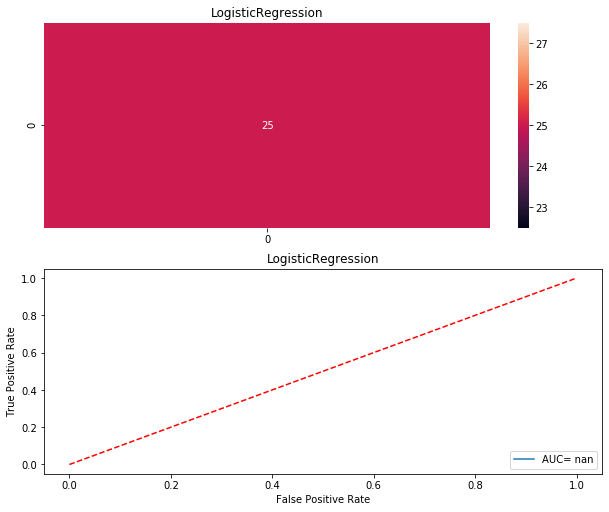

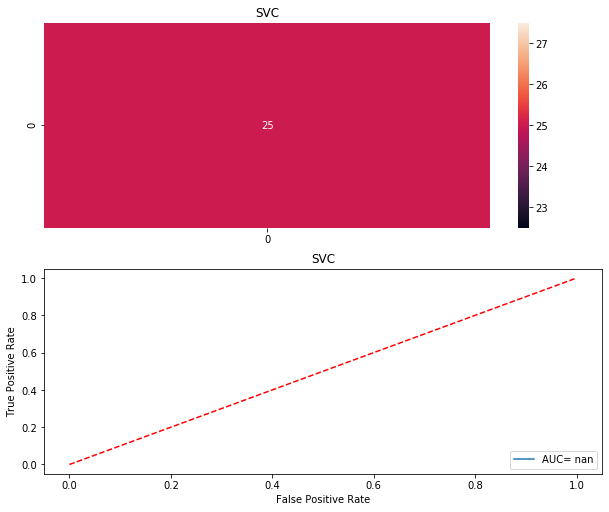

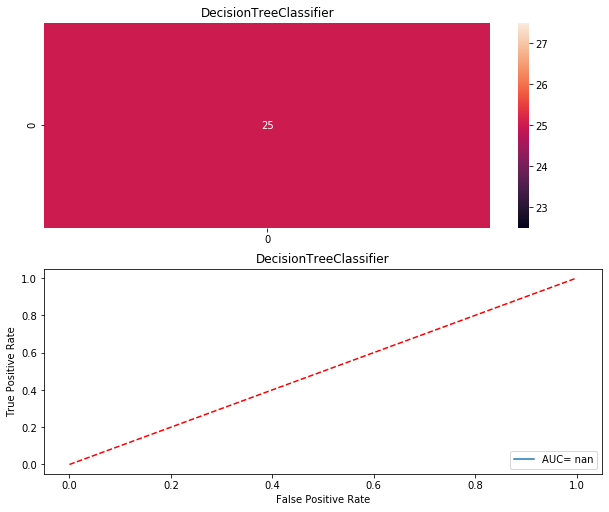

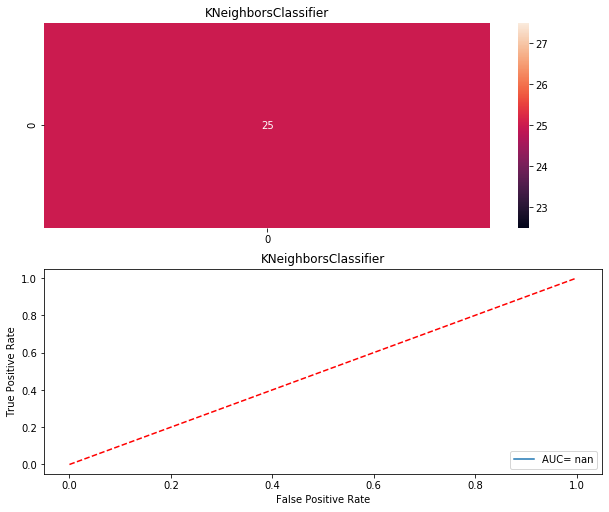

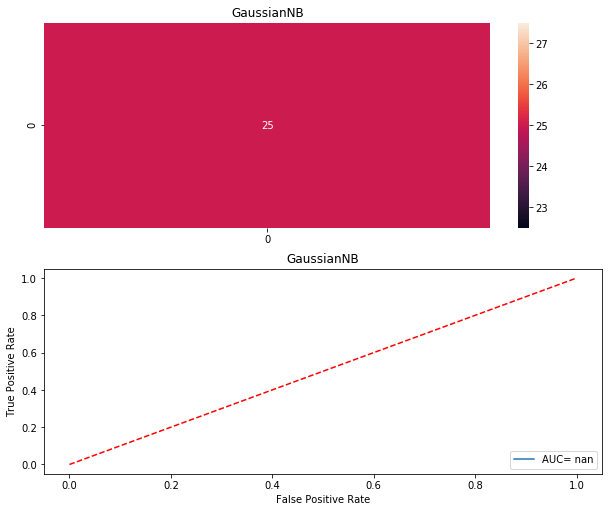

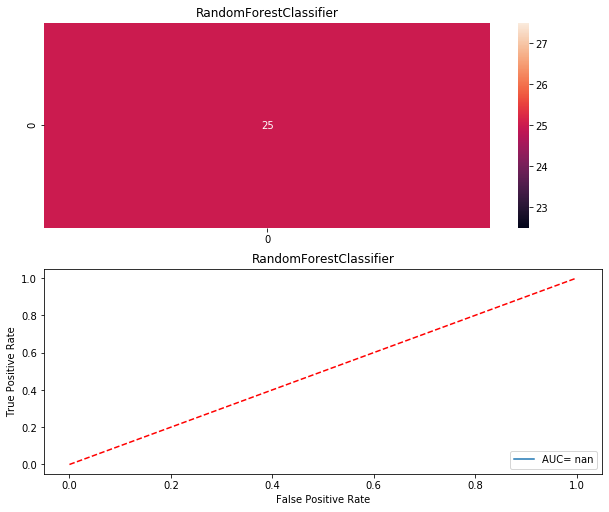

In [68]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre,pos_label=1)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [69]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.linear_model.LogisticRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[1.         0.96       0.96       1.         0.95833333]
0.9756666666666666
0.019877402021167435


In [70]:
#We tried all methods and till now SVC is the best option 
#Random state corresponding to highest r2 score is 43
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)
LR=LogisticRegression()
LR.fit(x_train,y_train)
predm=LR.predict(x_test)
accscr=accuracy_score(y_test,predm)
print("Mean score for LogisticRegression:",cross_val_score(LR,x,y,cv=5).mean())
print('Standard Deviation in score for LogisticRegression :',cross_val_score(LR,x,y,cv=5).std())
print("Accuracy score is:",accuracy_score(y_test,predm))

Mean score for LogisticRegression: 0.9756666666666666
Standard Deviation in score for LogisticRegression : 0.019877402021167435
Accuracy score is: 1.0


In [71]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(LR,"Project18_CovidCountrywise.pkl")

['Project18_CovidCountrywise.pkl']